## Setup and getting the date

### Imports and path

In [29]:
from fastai import *
from sklearn import *
from pandas_summary import DataFrameSummary as pd_summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PATH = "data/titanic/"

### Reading train set

In [3]:
train_raw = pd.read_csv(f'{PATH}train.csv')
train = train_raw
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
pd_summary(train).columns_stats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3
missing,0,0,0,0,0,177,0,0,0,0,687,2
missing_perc,0%,0%,0%,0%,0%,19.87%,0%,0%,0%,0%,77.10%,0.22%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


In [5]:
train.shape

(891, 12)

In [6]:
## NOTES on training set:
# Missing values in 3 cols: Age (~20%), Cabin (~80%), Embarked (~0.2%)
# 3 Categorical cols to be transformed to dummies: Ticket (681), Cabin (147), Embarked (3)

### Reading test set

In [7]:
test_raw = pd.read_csv(f'{PATH}test.csv')
test = test_raw
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
pd_summary(test).columns_stats

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,418,418,418,418,332,418,418,418,417,91,418
uniques,418,3,418,2,79,7,8,363,169,76,3
missing,0,0,0,0,86,0,0,0,1,327,0
missing_perc,0%,0%,0%,0%,20.57%,0%,0%,0%,0.24%,78.23%,0%
types,numeric,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


In [9]:
test.shape

(418, 11)

In [10]:
## NOTES on test set:
# Missing values in 3 cols: Age (20%), Fare (~0.2%), Cabin (~80%)
# 3 Categorical cols to be transformed to dummies: Ticket (363), Cabin (76), Embarked (3)

## Simple EDA on train set

### Plotting Survival histograms of numeric cols (Age, Pclass, Parch, SibSp, Fare)

In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
def plot_surv_hist(train,col,bins=10):
    train_survived = train[train.Survived==1]
    train_died = train[train.Survived==0]
    train_survived[col].plot.hist(color='blue', alpha=0.4,bins=bins)
    train_died[col].plot.hist(color='red',alpha=0.4,bins=bins)
    train[col].plot.hist(color='green',alpha=0.1,bins=bins,title=col)
    plt.show()

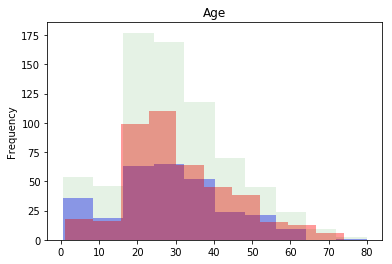

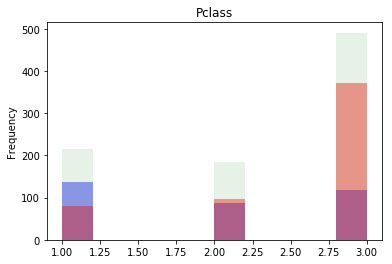

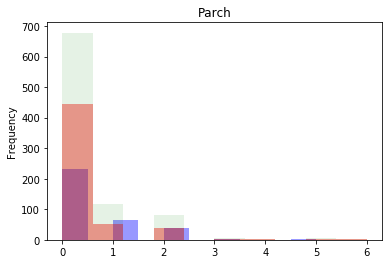

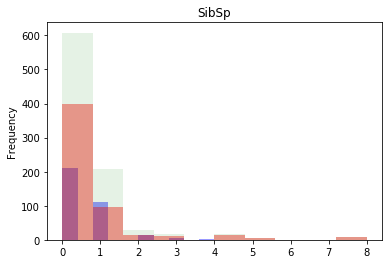

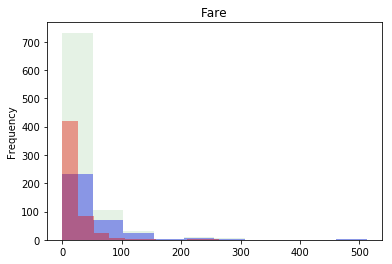

In [13]:
for col in ['Age','Pclass','Parch','SibSp','Fare']:
    plot_surv_hist(train,col)

In [14]:
## NOTES on Age in train: seems like wide variety but with distinguishable high-level buckets
# Let's try 3 buckets initially that seem to behave differently:
# <15 yrs (seem to survive more),
# 15-50 yrs (seem to die more),
# 50+ (seem more or less the same)

In [15]:
### NOTE on Pclass from histogram:
# Class 1: almost 2X survived
# Class 2: about the same
# Class 3: almost 3X died

In [16]:
### Potential note on Parch in train: similar to Sibsp above:
# # Passengers more likely to die when SibSp = 0 (when no parents/children with them)
# => for the other values, not very clear

In [17]:
### Potential note on SibSp from train:
# Passengers more likely to die when SibSp = 0 (when no spouses/siblings with them)
# => for the other values, not very clear

### Also looking at Sex in bar plotting:

In [55]:
train_survived = train[train.Survived==1]
train_died = train[train.Survived==0]

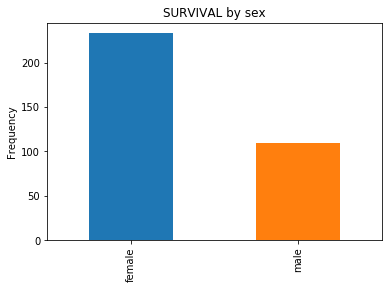

In [94]:
train_survived.Sex.value_counts().sort_index().plot.bar()
plt.title('SURVIVAL by sex')
plt.ylabel('Frequency')
plt.show()

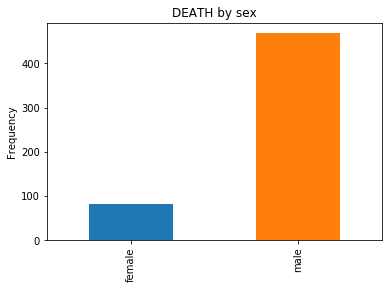

In [95]:
train_died.Sex.value_counts().sort_index().plot.bar()
plt.title('DEATH by sex')
plt.ylabel('Frequency')
plt.show()

(or simply doing it in one line of code for a combined graph)

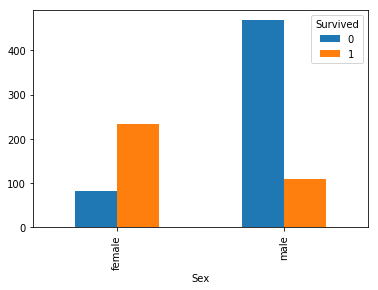

In [227]:
train.groupby('Sex').Survived.value_counts().unstack().plot.bar()

In [92]:
### Clearly Sex is an important feature for prediction of Survival

### Pivot table on training set

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
train_pivot = train.pivot_table(index='Sex',values='Survived')

(        Survived
 Sex             
 female  0.742038
 male    0.188908, <matplotlib.axes._subplots.AxesSubplot at 0x7fed2dee3da0>)

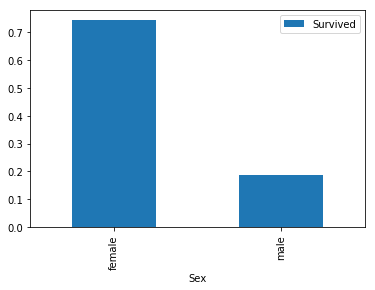

In [20]:
train_pivot, train_pivot.plot.bar()

In [54]:
### NOTE on Sex in train: survival rate per sex is:
# Female: ~75%
# Male: ~20%
# => Sex seems like an important feature

### Cutting Age in the sperate age groups previously identified

In [239]:
# splitting Age groups into <15 yrs, 15-50yrs, 50yrs+:
bins = [0,15,50,100]
age_group_names = ["Children","Adults","Seniors"]
age_cat = pd.cut(train.Age,bins=bins,labels=age_group_names)

Need to make sure all changes to train set (train_proc) are also directly reflected on the test set (test_proc)

In [241]:
train_proc = train
test_proc = test

train_proc["Age_Groups"] = age_cat
test_proc["Age_Groups"] = age_cat

test_proc.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Groups
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Adults
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Adults
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Adults


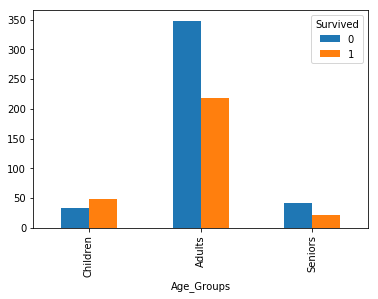

In [243]:
train_proc.groupby('Age_Groups').Survived.value_counts().unstack().plot.bar()

In [244]:
# convert the categories into numerals (incl -1 for na's)
# NOTE: this is probably not necessary since we're going to use 1-hot encoding next either way (pd.get_dummies)
train_proc.Age_Groups = age_cat.cat.codes
test_proc.Age_Groups = age_cat.cat.codes

test_proc.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Groups
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,-1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,-1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,1


In [249]:
## Let's not drop features from the data sets until we're really sure we want to get rid of them for good
# In the meantime, we'll prepare the features we're focused on to be read by RandomForest and similar models
# In particular, the 3 categorical features (Age_Groups, Pclass, Sex) need to be converted using get_dummies (which itself fills na)

In [309]:
def process_cat (df,col_name):
    dummies_df = pd.get_dummies(df[col_name],prefix=col_name)
    df = pd.concat([df,dummies_df], axis=1)
    return df

In [ ]:
## Perform the dummy columns additions to both train and test sets

In [310]:
for col in ["Age_Groups", "Sex", "Pclass"]:
    train_proc = process_cat(train_proc, col)
    test_proc = process_cat(test_proc, col)